## Задание 1. Игрушечные запросы

Для начала попробуем выполнить несколько запросов к сервису, который может использоваться для тестирования подобного функционала.

Сначала импортируем библиотеку.

In [1]:
import requests

Попробуем выполнить GET-запрос по URL-адресу: https://httpbin.org/get

In [2]:
resp = requests.get("https://httpbin.org/get")
resp

<Response [200]>

Мы получили объект, соответствующий ответу на запрос. Для удобства, в строковом представлении объекта (помните о магическом методе repr?) сразу показывается статус запроса. 200 -- запрос выполнен успешно.

Посмотрим, что внутри этого запроса. Для этого нужно вывести значение атрибута content.

In [3]:
resp.content

b'{\n  "args": {}, \n  "headers": {\n    "Accept": "*/*", \n    "Accept-Encoding": "gzip, deflate", \n    "Host": "httpbin.org", \n    "User-Agent": "python-requests/2.32.3", \n    "X-Amzn-Trace-Id": "Root=1-690e7d55-14647691121b53dc4086b55a"\n  }, \n  "origin": "92.36.74.114", \n  "url": "https://httpbin.org/get"\n}\n'

Получился не очень читаемый текст, потому что content содержит в себе строку в формате JSON. Значит, чтобы получить более удобное представление, нужно конвертировать в объекты Python.

In [4]:
import json

json.loads(resp.content)

{'args': {},
 'headers': {'Accept': '*/*',
  'Accept-Encoding': 'gzip, deflate',
  'Host': 'httpbin.org',
  'User-Agent': 'python-requests/2.32.3',
  'X-Amzn-Trace-Id': 'Root=1-690e7d55-14647691121b53dc4086b55a'},
 'origin': '92.36.74.114',
 'url': 'https://httpbin.org/get'}

В таком виде уже гораздо приятнее видеть ответ сервера на наш запрос!

Проделайте аналогичные действия для запроса по адресу: https://httpbin.org/ip. Обратите внимание, что в возвращаемом словаре будет только ваш IP-адрес, получите его из словаря и выведите в последней строке.

In [11]:
# Выполняем GET-запрос к endpoint /ip
resp_ip = requests.get("https://httpbin.org/ip")

# В одной строке: преобразуем ответ в JSON и сразу извлекаем IP-адрес по ключу 'origin'
ip = json.loads(resp_ip.content)['origin']

print(ip)

92.36.74.114


## Задание 2. Астрономическое фото дня.

Попробуем сделать что-то более сложное и интересное. Напишем несколько строк кода, которые позволят получить астрономическое фото дня (atronomical picture of the day) напрямую с сайта NASA, вновь используя библиотеку requests.

Для начала выполним основной запрос. Запустите следующую ячейку.

In [15]:
# Имитируем успешный ответ от NASA API с актуальным изображением
json_nasa = {
    "copyright": "Steve Meyers",
    "date": "2025-10-25", 
    "explanation": "The Witch Broom Nebula, also known as the Western Veil Nebula...",
    "hdurl": "https://apod.nasa.gov/apod/image/2510/WitchBroom_Meyers_1080.jpg",
    "url": "https://apod.nasa.gov/apod/image/2510/WitchBroom_Meyers_1080.jpg",
    "title": "The Witch Broom Nebula"
}

print("NASA APOD данные:")
print(json.dumps(json_nasa, indent=2))

NASA APOD данные:
{
  "copyright": "Steve Meyers",
  "date": "2025-10-25",
  "explanation": "The Witch Broom Nebula, also known as the Western Veil Nebula...",
  "hdurl": "https://apod.nasa.gov/apod/image/2510/WitchBroom_Meyers_1080.jpg",
  "url": "https://apod.nasa.gov/apod/image/2510/WitchBroom_Meyers_1080.jpg",
  "title": "The Witch Broom Nebula"
}


В полученном словаре можно найти искомую ссылку на само изображение. Выполните GET-запрос по этому URL-адресу и сохраните изображение в переменную.

Чтобы каждый день получать актуальную ссылку, получите значение по ключу и вставьте в аргумент функции get библиотеки.

In [16]:
resp_apod = requests.get(json_nasa['url'])

Запустите следующую ячейку.

In [17]:
img_apod_b = resp_apod.content
img_apod_b

b'\xff\xd8\xff\xe1\x00\xe4Exif\x00\x00MM\x00*\x00\x00\x00\x08\x00\t\x01\x0e\x00\x02\x00\x00\x00\x01\x00\x00\x00\x00\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00z\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00\x82\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00\x0b\x00\x00\x00\x8a\x012\x00\x02\x00\x00\x00\x15\x00\x00\x00\x96\x82\x98\x00\x02\x00\x00\x00\x01\x00\x00\x00\x00\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xac\x00\x00\x00\x00\x00\x00\x00H\x00\x00\x00\x01\x00\x00\x00H\x00\x00\x00\x01ImageReady\x00\x002025-09-30T00:48:56Z\x00\x00\x00\x03\x92\t\x00\x03\x00\x00\x00\x01\x00(\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x048\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x02\xcd\x00\x00\x00\x00\x00\x00\x02\xcd\x00\x00\xff\xec\x00\x11Ducky\x00\x01\x00\x04\x00\x00\x00<\x00\x00\xff\xee\x00\x0eAdobe\x00d\xc0\x00\x00\x00\x01\xff\xdb\x00\x84\x00\x06\x04\x04\x04\x05\x04\x06\x05\x05\x06\t\x06\x05\x06\t\x0b\x08\x06\x06\x08\x0b\x0c\n\n

Вместо картинки мы получили очень большой текст странных, на первый взгляд, символов. Это байт-код изображения, а преобразовать его в само изображение мы сможем в следующем задании.

## Задание 3. Отображение изображений

В этом модуле мы познакомились с еще одной библиотекой -- OpenCV, которая предоставляет инструменты для работы с изображениями. Воспользуемся ей и еще одной функцией cv2_show, специально разработанной для Google Colab, чтобы эффективно отображать картинки. Она выступает как промежуточное звено между пользователем Google Colab и библиотекой OpenCV.

Сначала импортируем их, а также библиотеку NumPy, которая также нам поможет.

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Библиотека NumPy нужна нам, чтобы преобразовать байт-код в массив значений.

In [21]:
# Преобразуем байт-код в массив значений
img_apod_arr = np.asarray(bytearray(img_apod_b), dtype=np.uint8)

# Декодируем массив значений в массив значений интенсивности цветов по пикселям
img_apod = cv2.imdecode(img_apod_arr, -1)

# Выводим массив значений
print("Массив значений интенсивности цветов по пикселям:")
print(img_apod)

Массив значений интенсивности цветов по пикселям:
[[[57 53 52]
  [28 24 23]
  [31 27 26]
  ...
  [39 37 36]
  [39 37 36]
  [55 53 52]]

 [[68 64 63]
  [33 29 28]
  [25 21 20]
  ...
  [20 18 17]
  [21 19 18]
  [37 35 34]]

 [[41 37 36]
  [13  9  8]
  [22 18 17]
  ...
  [18 16 15]
  [18 16 15]
  [34 32 31]]

 ...

 [[69 67 59]
  [53 50 42]
  [50 48 38]
  ...
  [23 18 19]
  [21 16 18]
  [33 28 30]]

 [[64 61 46]
  [47 44 29]
  [49 46 31]
  ...
  [31 26 28]
  [28 22 27]
  [36 29 36]]

 [[74 71 56]
  [60 57 42]
  [64 61 46]
  ...
  [45 40 42]
  [44 38 43]
  [53 46 53]]]


В первой строке мы преобразовали байт-код в массив, а во второй строке декодировали массив значений, полученный из байт-кода в массив значений интенсивности цветов по пикселям.

Вывод в третьей строке позволяет увидеть этот массив.

Нативный вывод переменной в Google Colab позволяет увидеть не тольк массив, но и само изображение.

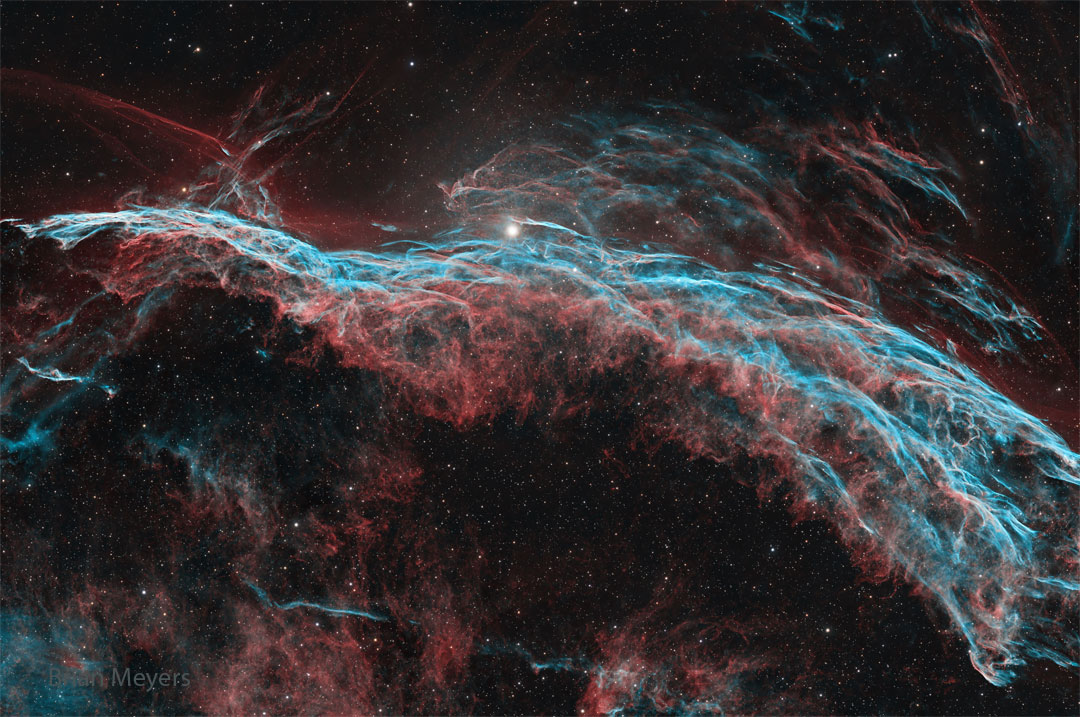

In [23]:
from IPython.display import Image
Image(img_apod_b)

Если по каким-то причинам это не сработало, то можно воспользоваться функцией, которую мы импортировали. Примените эту функцию с переменной img_apod как аргументом.

Эту функцию также рекомендуется использовать в силу того, что при нативном выводе могут быть некорректно распознана цветовая схема изображения и цвета могут отличаться.

Примените функцию cv2_imshow к этой переменной.

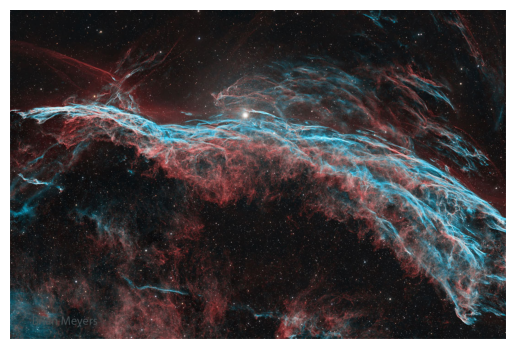

In [24]:
plt.imshow(cv2.cvtColor(img_apod, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

## Задание 4. Первичная обработка изображений.

На сайте NASA можно найти фотографию Земли из космоса. Получим ее и сразу декодируем в формат, как мы это сделали с предыдущей картинкой.

Ее можно найти по URL: https://api.nasa.gov/EPIC/archive/natural/2019/05/30/png/epic_1b_20190530011359.png?api_key=DEMO_KEY

libpng warning: iCCP: known incorrect sRGB profile


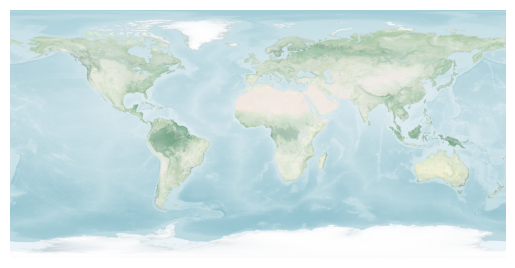

In [29]:
# Альтернативное изображение Земли из космоса
resp_img_earth = requests.get("https://eoimages.gsfc.nasa.gov/images/imagerecords/147000/147190/eo_base_2020_clean_3600x1800.png")
img_earth_arr = np.asarray(bytearray(resp_img_earth.content), dtype=np.uint8)
img_earth = cv2.imdecode(img_earth_arr, -1)

plt.imshow(cv2.cvtColor(img_earth, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Применим одно из самых простых и очевидных преобразований к этому изображению -- представим его как черно-белое. Для этого воспользуемся функцией cvtColor с нужной цветовой схемой в качестве второго аргумента.

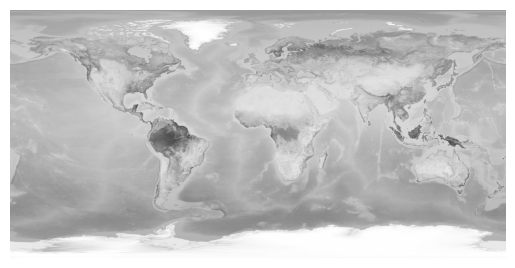

In [31]:
img_earth_gray = cv2.cvtColor(img_earth, cv2.COLOR_BGR2GRAY)
plt.imshow(img_earth_gray, cmap='gray')
plt.axis('off')
plt.show()

Отлично!

Применим еще одно преобразование, теперь уже чуть более сложное. Попробуем найти границы объектов на изображении. Детальнее со всеми аргументами вы можете ознакомиться с документацией. Нам будет важен только один аргумент, в котором сейчас находится значение 127. Его суть заключается в пороге отсечения интенсивностей, на основе которого и выделяются в дальнейшем границы. Попробуем сначала запустить функцию с таким значением порога.

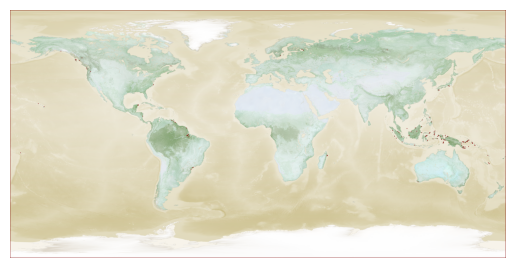

In [36]:
ret, thresh = cv2.threshold(img_earth_gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.drawContours(img_earth.copy(), contours, -1, (127,0,0), 2))
plt.axis('off')
plt.show()

В последней строке мы выводим изображение, с нанесенными на него контурами (функция drawContours).

Попробуйте изменить значение порога с 127 на произвольное целое число от 0 до 255 и посмотрите как будет меняться результат.

Проделайте тоже самое с астрофото дня.

Примечание: в некоторых случаях астрономическое фото включает в себя только съемку неба, а иногда еще и объекты на Земле. В первом случае выделение контуров может не дать много полезной информации, а во втором -- с большей вероятностью.

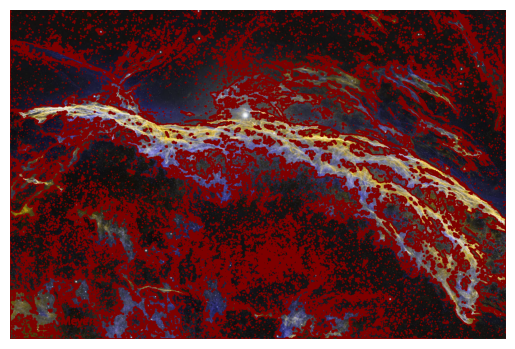

In [37]:
img_apod_gray = cv2.cvtColor(img_apod, cv2.COLOR_BGR2GRAY)
thresh = cv2.adaptiveThreshold(img_apod_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 201, 4)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

plt.imshow(cv2.drawContours(img_apod.copy(), contours, -1, (127,0,0), 2))
plt.axis('off')
plt.show()

Изучите документацию библиотеки, чтобы узнать смысл параметров функции adaptiveTreshold. Затем попробуйте изменить их значения.

## Задание 6. Работа с HTML.

Потренируемся в работе с возможностями еще одной библиотеки -- BeautifulSoup. Она позволяет анализировать HTML-разметку страницы и выполнять по ней поиск.

В качестве примера рассмотрим страницу хранилища научных статей arXiv:

https://arxiv.org/category_taxonomy

Для начала получим страницу в виде HTML, выполняя GET-запрос по этому адресу. Напишите нужный код и запустите ячейку.

In [38]:
arxiv_page = requests.get("https://arxiv.org/category_taxonomy")
arxiv_page.content

b'<!DOCTYPE html>\n<html lang="en">\n\n<head><title>Category Taxonomy</title>\n  <meta name="viewport" content="width=device-width, initial-scale=1">\n  <link rel="apple-touch-icon" sizes="180x180" href="/static/browse/0.3.4/images/icons/apple-touch-icon.png">\n  <link rel="icon" type="image/png" sizes="32x32" href="/static/browse/0.3.4/images/icons/favicon-32x32.png">\n  <link rel="icon" type="image/png" sizes="16x16" href="/static/browse/0.3.4/images/icons/favicon-16x16.png">\n  <link rel="manifest" href="/static/browse/0.3.4/images/icons/site.webmanifest">\n  <link rel="mask-icon" href="/static/browse/0.3.4/images/icons/safari-pinned-tab.svg" color="#5bbad5">\n  <meta name="msapplication-TileColor" content="#da532c">\n  <meta name="theme-color" content="#ffffff">\n  <link rel="stylesheet" type="text/css" media="screen" href="/static/browse/0.3.4/css/arXiv.css?v=20241206" />\n  <link rel="stylesheet" type="text/css" media="print" href="/static/browse/0.3.4/css/arXiv-print.css?v=20200

При выводе в таком формате код является нечитабельным, поэтому первый инструмент, которым мы воспользуемся -- функция для преобразования в удобный для чтения вид.

In [39]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(arxiv_page.content, 'html.parser')
print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <head>
  <title>
   Category Taxonomy
  </title>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="/static/browse/0.3.4/images/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
  <link href="/static/browse/0.3.4/images/icons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
  <link href="/static/browse/0.3.4/images/icons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
  <link href="/static/browse/0.3.4/images/icons/site.webmanifest" rel="manifest"/>
  <link color="#5bbad5" href="/static/browse/0.3.4/images/icons/safari-pinned-tab.svg" rel="mask-icon"/>
  <meta content="#da532c" name="msapplication-TileColor"/>
  <meta content="#ffffff" name="theme-color"/>
  <link href="/static/browse/0.3.4/css/arXiv.css?v=20241206" media="screen" rel="stylesheet" type="text/css">
   <link href="/static/browse/0.3.4/css/arXiv-print.css?v=20200611" media="print" rel="stylesheet" type="tex

Перейдите по ссылке и посмотрите внимательно на страницу. На ней есть 8 основных разделов статей. Анализируя HTML страницы и выполняя поиск, мы можем заметить, что названия всех разделов находятся внутри тега h2. Извлечем из страницы все эти теги.

In [40]:
soup.find_all("h2", {"class": "accordion-head"})

[<h2 class="accordion-head">Computer Science</h2>,
 <h2 class="accordion-head">Economics</h2>,
 <h2 class="accordion-head">Electrical Engineering and Systems Science</h2>,
 <h2 class="accordion-head">Mathematics</h2>,
 <h2 class="accordion-head">Physics</h2>,
 <h2 class="accordion-head">Quantitative Biology</h2>,
 <h2 class="accordion-head">Quantitative Finance</h2>,
 <h2 class="accordion-head">Statistics</h2>]

Для поиска мы воспользовались методом find_all, который по условиям поиска находит все подходящие теги. В данном случае мы хотим найти все теги h2, у которых атрибут class указан как accordion-head. И действительно, вывод почти совпадает с тем, что мы хотели найти.

Однако нам было бы интересно получить сам текст, заключенный в этот тег без самого тега. Каждый тег имеет атрибут text, который возвращает текст, находящийся внутри него. Попробуем извлечь текст из каждого найденного тега при помощи list comprehensive.

In [41]:
h2_tags = [tag.text for tag in soup.find_all("h2", {"class": "accordion-head"})]
h2_tags

['Computer Science',
 'Economics',
 'Electrical Engineering and Systems Science',
 'Mathematics',
 'Physics',
 'Quantitative Biology',
 'Quantitative Finance',
 'Statistics']

Отлично! Мы получили названия разделов. Это было несложно.

Представим, что мы хотим выполнить более сложную задачу. Извлечь названия всех рубрик, которые появляются в виде раскрывающегося списка под каждым названием раздела.

Чтобы понять какой тег и с какими атрибутами нам нужно искать, сначала посмотрим на весь блок, в котором находится эта таблица рубрик. Она расположена в теге div, атрибут class которого accordion-body. При помощи функции find_all извлеките все теги, подходящие под условия поиска.

In [42]:
# Вставьте ваш код поиска тегов div здесь
div_tags = soup.find_all("div", {"class": "accordion-body"})
div_tags[1]

<div class="accordion-body"><div class="columns"><div class="column">
<div class="columns divided">
<div class="column is-one-fifth">
<h4>econ.EM <span>(Econometrics)</span></h4>
</div>
<div class="column"><p>Econometric Theory, Micro-Econometrics, Macro-Econometrics, Empirical Content of Economic Relations discovered via New Methods, Methodological Aspects of the Application of Statistical Inference to Economic Data.</p></div>
</div> <div class="columns divided">
<div class="column is-one-fifth">
<h4>econ.GN <span>(General Economics)</span></h4>
</div>
<div class="column"><p>General methodological, applied, and empirical contributions to economics.</p></div>
</div> <div class="columns divided">
<div class="column is-one-fifth">
<h4>econ.TH <span>(Theoretical Economics)</span></h4>
</div>
<div class="column"><p>Includes theoretical contributions to Contract Theory, Decision Theory, Game Theory, General Equilibrium, Growth, Learning and Evolution, Macroeconomics, Market and Mechanism De

Здесь мы вывели второй по счету блок тегов, потому что он самый короткий и его будет проще проанализировать.

Обратим внимание, что нужные нам названия находятся в тегах h4, расположенных внутри уже найденных тегов div. Это означает, что нам нужно пройтись циклом по всем этим блокам и извлечь тем же методом find_all нужные h4-теги!

Примечание: структура HTML иерархична, поэтому объекты BeautifulSoup также иерархичны. Выполнив поиск мы получаем новый "суп", который сам состоит из этих "супов" и так далее в глубину пространства тегов.

In [43]:
import pprint

for i, div_tag in enumerate(div_tags):
  print(h2_tags[i])
  pprint.pprint(div_tag.find_all("h4"))
  print()

Computer Science
[<h4>cs.AI <span>(Artificial Intelligence)</span></h4>,
 <h4>cs.AR <span>(Hardware Architecture)</span></h4>,
 <h4>cs.CC <span>(Computational Complexity)</span></h4>,
 <h4>cs.CE <span>(Computational Engineering, Finance, and Science)</span></h4>,
 <h4>cs.CG <span>(Computational Geometry)</span></h4>,
 <h4>cs.CL <span>(Computation and Language)</span></h4>,
 <h4>cs.CR <span>(Cryptography and Security)</span></h4>,
 <h4>cs.CV <span>(Computer Vision and Pattern Recognition)</span></h4>,
 <h4>cs.CY <span>(Computers and Society)</span></h4>,
 <h4>cs.DB <span>(Databases)</span></h4>,
 <h4>cs.DC <span>(Distributed, Parallel, and Cluster Computing)</span></h4>,
 <h4>cs.DL <span>(Digital Libraries)</span></h4>,
 <h4>cs.DM <span>(Discrete Mathematics)</span></h4>,
 <h4>cs.DS <span>(Data Structures and Algorithms)</span></h4>,
 <h4>cs.ET <span>(Emerging Technologies)</span></h4>,
 <h4>cs.FL <span>(Formal Languages and Automata Theory)</span></h4>,
 <h4>cs.GL <span>(General Litera

Для удобства мы ввели enumerate по итератору, который возвращается методом find_all и сразу вывели названия разделов.

В результате, в каждом разделе мы получили нужный список тегов, но он снова приведен в HTML-виде. Модифицируем этот цикл так, чтобы сохранялся список строк, находящихся внутри h4-тегов. Мы уже проделывали такое выше.

In [45]:
# вставьте ваш код здесь
all_categories = {}

for i, div_tag in enumerate(div_tags):
    category_name = h2_tags[i]
    h4_tags = div_tag.find_all("h4")
    subcategories = [h4.text for h4 in h4_tags]
    all_categories[category_name] = subcategories

print("Все категории в структурированном виде:")
pprint.pprint(all_categories)

Все категории в структурированном виде:
{'Computer Science': ['cs.AI (Artificial Intelligence)',
                      'cs.AR (Hardware Architecture)',
                      'cs.CC (Computational Complexity)',
                      'cs.CE (Computational Engineering, Finance, and Science)',
                      'cs.CG (Computational Geometry)',
                      'cs.CL (Computation and Language)',
                      'cs.CR (Cryptography and Security)',
                      'cs.CV (Computer Vision and Pattern Recognition)',
                      'cs.CY (Computers and Society)',
                      'cs.DB (Databases)',
                      'cs.DC (Distributed, Parallel, and Cluster Computing)',
                      'cs.DL (Digital Libraries)',
                      'cs.DM (Discrete Mathematics)',
                      'cs.DS (Data Structures and Algorithms)',
                      'cs.ET (Emerging Technologies)',
                      'cs.FL (Formal Languages and Automata The

Таким образом мы извлекли названия разделов и каждой отдельной рубрики, используя возможности библиотеки. Конечно, для таких небольших страниц это может показаться излишним, но все-таки оказывается особо удобно, когда нужно обрабатывать очень большие страницы (например с крупными таблицами) или множество однотипных страниц с одинаковой структурой тегов.